In [2]:
import pandas as pd

In [4]:
import geopandas as gpd

In [10]:
import matplotlib.pyplot as plt
import descartes
%matplotlib inline

In [11]:
uk_map_df = gpd.read_file("./Igismap/UnitedKingdom_Bound.shp")

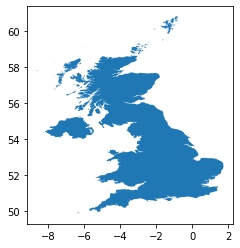

In [12]:
uk_map_df.plot()

In [13]:
d={
    'id': [1,2,3], 'postcode': ['NN1', 'LS10', 'E1'], 'flag': [1,1,1]
}

In [14]:
data_df = pd.DataFrame(data=d)

In [15]:
data_df

,id,postcode,flag
0,1,NN1,1
1,2,LS10,1
2,3,E1,1


In [16]:
outward_postcode_lookp_df = pd.read_csv("./postcode-outcodes.csv")

In [18]:
postcode_joined_df = data_df.merge(outward_postcode_lookp_df, on="postcode")

In [19]:
from shapely.geometry import Point, Polygon

In [24]:
geometry = [Point(xy) for xy in zip(postcode_joined_df.longitude, postcode_joined_df.latitude)]

In [25]:
geo_df =  gpd.GeoDataFrame(postcode_joined_df, crs={'init': 'epsg:4326'}, geometry=geometry)

In [26]:
geo_df

,id_x,postcode,flag,id_y,latitude,longitude,geometry
0,1,NN1,1,1736,52.24154,-0.88682,POINT (-0.88682 52.24154)
1,2,LS10,1,1489,53.76162,-1.53123,POINT (-1.53123 53.76162)
2,3,E1,1,730,51.51766,-0.05841,POINT (-0.05841 51.51766)


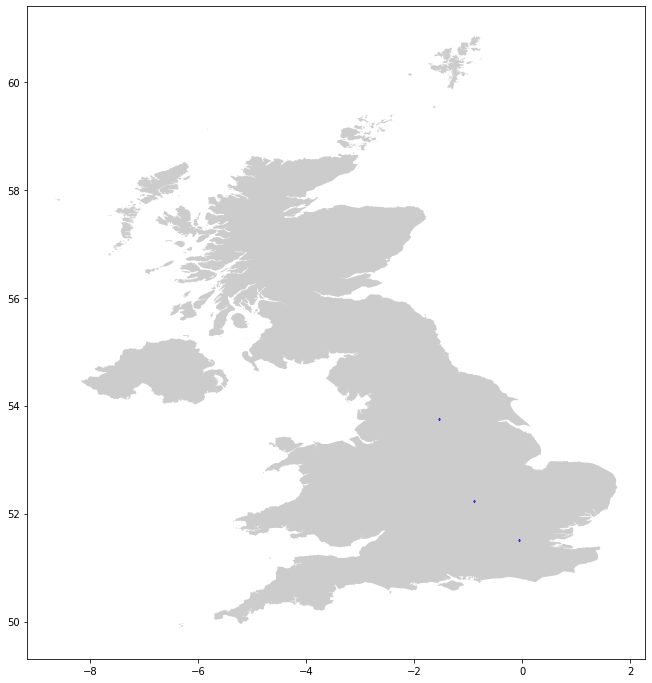

In [29]:
fig,ax =plt.subplots(figsize=(12,12))
geo_df.geometry.plot(marker='d', color='blue', markersize=3, ax=ax, label="Plot Postcode on Map")
uk_map_df.plot(color='grey', ax=ax, alpha =0.4)